# PREPROCESSING PROCESS


# **0. About Dataset**

## **Article Dataset**

**Description :**
This dataset contains a collection of articles along with various attributes and metadata. The dataset encompasses articles from a range of fields of study, including "Artificial Intelligence," "Bioengineering," "Biotechnology," "Environmental Engineering," "Food Science," "Industrial and Manufacturing Engineering," "Management Information Systems," "Nuclear Energy and Engineering," "Physical and Theoretical Chemistry," and "Visual Arts and Performing Arts."

**Fields in Dataset :**
- Authors: The names of the authors who contributed to the article.
- Author full names: The full names of the authors as they appear in the publication, along with their author(s) ID.
- Author(s) ID: A unique ID assigned by Scopus for each author.
- Title: The title of the research article.
- Year: The year the article was published.
- Source title: The name of the journal or conference where the article was published.
- Volume: The volume number of the journal or conference.
- Issue: The issue number of the journal or conference.
- Art. No.: The article number, if applicable.
- Page start: The starting page of the article in the journal or conference proceedings.
- Page end: The ending page of the article in the journal or conference proceedings.
- Page count: The number of pages in the article.
- Cited by: The number of times the article has been cited by other articles.
- DOI: The Digital Object Identifier providing a permanent link to the article.
- Link: The direct link to the article on Scopus or the publisher's site.
- Affiliations: The institutions or organizations with which the authors are affiliated.
- Authors with affiliations: A list of authors along with their affiliations.
- Abstract: A brief summary of the article's content.
- Author Keywords: Keywords provided by the authors to describe the main topics of the article.
- Index Keywords: Keywords indexed by Scopus for searching and categorizing the article.
- Molecular Sequence Numbers: The molecular sequence numbers mentioned in the article, if any.
- Chemicals/CAS: The chemicals and their Chemical Abstracts Service (CAS) numbers related to the research in the article.
- Tradenames: The trade names of chemicals or products mentioned in the article.
- Manufacturers: The manufacturers of the chemicals or products mentioned in the article.
- Funding Details: Details about the research funding, including the names of the funding agencies.
- Funding Texts: The text including funding information within the article.
- References: The list of references used in the article.
- Correspondence Address: The correspondence address for the lead author or contact author.
- Editors: The names of the editors responsible for the article.
- Publisher: The publisher that published the journal or conference proceedings.
- Sponsors: The organizations or entities that sponsored the research or publication.
- Conference name: The name of the conference where the article was presented, if applicable.
- Conference date: The date of the conference where the article was presented, if applicable.
- Conference location: The location of the conference where the article was presented, if applicable.
- Conference code: The unique code for the conference, if applicable.
- ISSN: The International Standard Serial Number of the journal.
- ISBN: The International Standard Book Number of the conference proceedings.
- CODEN: The unique publication code for identifying the journal.
- PubMed ID: The unique ID of the article in PubMed, if the article is indexed there.
- Language of Original Document: The original language of the document/article.
- Abbreviated Source Title: The abbreviated title of the source.
- Document Type: The type of document (e.g., article, review, etc.).
- Publication Stage: The publication stage of the article (e.g., final, etc.).
- Open Access: The open access status of the article (All Open Access, Bronze Open Access, Gold Open Access, Green Open Access, Hybrid Open Access).
- Source: The data source, which is Scopus.
- EID: The unique Scopus ID for the article.

## **Ratings Dataset**

**Description :**
Is the dummy dataset about how user rate the article. So this user_id is rating the article based on the article_id with the rating value is article_rating. Now one user can rate many article_ids, and vice versa, but user_id can only rate the same article_id once.

**Fields in Dataset :**
- user_id : ID from User Dataset
- article_id : ID from Article Dataset
- article_rating: Value of rating




## **User Dataset**

**Description :**
This dummy dataset contains a collection of user information that login at our application.

**Fields in Dataset :**
- User ID : ID unique
- Name : Name of User

# **Install and Import Libraries**
Dalam penggunaan Google Colab, sebelum menggunakan fitur-fitur yang tersedia dalam library yang sudah dijelaskan sebelumnya (NumPy, Matplotlib, dsb.), library yang ingin digunakan harus di-import terlebih dahulu demgam menggunakan syntax:

`import namaLibrary as abc`

Bagian syntax "as abc" opsional, namun khususnya bagian "abc" biasanya sudah ada best practice penamaan library (Seperti np untuk NumPy, pd untuk Pandas, dsb.) dan akan teman-teman gunakan untuk "memanggil" fungsi (fitur) yang ditawarkan sebuah library.

# **Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


# **Data Loading**

In [ ]:
# Load the 'Artificial Intelligence' dataset
df_ai = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Artificial%20Intelligence.csv')
df_ai.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",55921038800; 35731728100; 57189380636; 5720916...,Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3,NaN,NaN,1889,...,978-151081058-7,NaN,NaN,English,"Int. Conf. Mach. Learn., ICML",Conference paper,Final,NaN,Scopus,2-s2.0-84969963490
1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",55394634800; 15519161300,VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,NaN,NaN,NaN,216,...,978-157735657-8,NaN,NaN,English,"Proc. Int. Conf. Weblogs Soc. Media, ICWSM",Conference paper,Final,NaN,Scopus,2-s2.0-84909954410
2,Kohavi R.,"Kohavi, Ron (56355116300)",56355116300,A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,2,NaN,NaN,1137,...,NaN,NaN,NaN,English,IJCAI Int. Joint Conf. Artif. Intell.,Conference paper,Final,NaN,Scopus,2-s2.0-85164392958
3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",6506837280; 58405605600; 23135978500; 57209365...,Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,"Proc. Int. Conf. Artif. Intell. Stat., AISTATS",Conference paper,Final,NaN,Scopus,2-s2.0-85083937116
4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",7006576714; 56984291600,Image information and visual quality,2006,IEEE Transactions on Image Processing,15,2,NaN,430,...,NaN,IIPRE,16479813.0,English,IEEE Trans Image Process,Article,Final,NaN,Scopus,2-s2.0-31144478351


In [ ]:
# Load the 'Bioengineering' dataset
df_be = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Bioengineering.csv')
df_be.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Franz S.; Rammelt S.; Scharnweber D.; Simon J.C.,"Franz, Sandra (7006595942); Rammelt, Stefan (7...",7006595942; 7003413402; 7003773985; 35433335800,Immune responses to implants - A review of the...,2011,Biomaterials,32,28,NaN,6692,...,NaN,BIMAD,21715002.0,English,Biomaterials,Review,Final,NaN,Scopus,2-s2.0-79960556002
1,Singh N.; Manshian B.; Jenkins G.J.S.; Griffit...,"Singh, Neenu (8571462100); Manshian, Bella (23...",8571462100; 23995351100; 16309264200; 87146791...,NanoGenotoxicology: The DNA damaging potential...,2009,Biomaterials,30,23-24,NaN,3891,...,NaN,BIMAD,19427031.0,English,Biomaterials,Review,Final,NaN,Scopus,2-s2.0-67349133554
2,Temenoff J.S.; Mikos A.G.,"Temenoff, Johnna S. (6603120613); Mikos, Anton...",6603120613; 7102513404,Review: Tissue engineering for regeneration of...,2000,Biomaterials,21,5,NaN,431,...,NaN,BIMAD,10674807.0,English,Biomaterials,Review,Final,NaN,Scopus,2-s2.0-0033983594
3,Balgude A.P.; Yu X.; Szymanski A.; Bellamkonda...,"Balgude, A.P. (59018860000); Yu, X. (557396909...",59018860000; 55739690900; 6602815053; 7003809677,Agarose gel stiffness determines rate of DRG n...,2001,Biomaterials,22,10,NaN,1077,...,NaN,BIMAD,11352088.0,English,Biomaterials,Article,Final,NaN,Scopus,2-s2.0-0035105945
4,Lynd L.R.; Van Zyl W.H.; McBride J.E.; Laser M.,"Lynd, Lee R. (35586183800); Van Zyl, Willem H....",35586183800; 7005925838; 9268428600; 8954141000,Consolidated bioprocessing of cellulosic bioma...,2005,Current Opinion in Biotechnology,16,5,NaN,577,...,NaN,CUOBE,16154338.0,English,Curr. Opin. Biotechnol.,Review,Final,NaN,Scopus,2-s2.0-25844505728


In [ ]:
# Load the 'Biotechnology' dataset
df_bt = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Biotechnology.csv')
df_bt.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Sander J.D.; Joung J.K.,"Sander, Jeffry D. (16680409800); Joung, J. Kei...",16680409800; 55665179600,"CRISPR-Cas systems for editing, regulating and...",2014,Nature Biotechnology,32,4,NaN,347,...,NaN,NABIF,24584096.0,English,Nat. Biotechnol.,Review,Final,All Open Access; Green Open Access,Scopus,2-s2.0-84900314611
1,Jackson A.L.; Bartz S.R.; Schelter J.; Kobayas...,"Jackson, Aimee L. (7402785547); Bartz, Steven ...",7402785547; 6602883961; 6507801453; 7405378931...,Expression profiling reveals off-target gene r...,2003,Nature Biotechnology,21,6,NaN,635,...,NaN,NaN,12754523.0,English,Nat. Biotechnol.,Article,Final,NaN,Scopus,2-s2.0-0037685280
2,Zhao J.; Davis L.C.; Verpoorte R.,"Zhao, Jian (53982241300); Davis, Lawrence C. (...",53982241300; 24434844100; 36041084100,Elicitor signal transduction leading to produc...,2005,Biotechnology Advances,23,4,NaN,283,...,NaN,BIADD,15848039.0,English,Biotechnol. Adv.,Review,Final,NaN,Scopus,2-s2.0-17644391449
3,Bianco A.; Kostarelos K.; Prato M.,"Bianco, Alberto (7203002764); Kostarelos, Kost...",7203002764; 56134375900; 56423307400,Applications of carbon nanotubes in drug delivery,2005,Current Opinion in Chemical Biology,9,6,NaN,674,...,NaN,COCBF,16233988.0,English,Curr. Opin. Chem. Biol.,Review,Final,NaN,Scopus,2-s2.0-27744504244
4,Banat I.M.; Makkar R.S.; Cameotra S.S.,"Banat, I.M. (7005566530); Makkar, R.S. (700447...",7005566530; 7004478276; 6701450687,Potential commercial applications of microbial...,2000,Applied Microbiology and Biotechnology,53,5,NaN,495,...,NaN,AMBID,10855707.0,English,Appl. Microbiol. Biotechnol.,Short survey,Final,NaN,Scopus,2-s2.0-0034078278


In [ ]:
# Load the 'Environmental Engineering' dataset
df_ee = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Environmental%20Engineering.csv')
df_ee.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Beven K.,"Beven, Keith (7102404194)",7102404194,"Prophecy, reality and uncertainty in distribut...",1993,Advances in Water Resources,16,1,NaN,41,...,NaN,AWRED,NaN,English,Adv. Water Resour.,Article,Final,NaN,Scopus,2-s2.0-0027788553
1,Qin B.; Xu P.; Wu Q.; Luo L.; Zhang Y.,"Qin, Boqiang (7102846048); Xu, Pengzhu (160443...",7102846048; 16044337100; 55322340700; 14020135...,"Environmental issues of Lake Taihu, China",2007,Hydrobiologia,581,1,NaN,3,...,NaN,HYDRB,NaN,English,Hydrobiologia,Conference paper,Final,NaN,Scopus,2-s2.0-33947272149
2,Foley S.; Tiepolo M.; Vannucci R.,"Foley, Stephen (7101864035); Tiepolo, Massimo ...",7101864035; 6603574295; 56277719700,Growth of early continental crust controlled b...,2002,Nature,417,6891,NaN,837,...,NaN,NaN,12075348.0,English,Nature,Article,Final,NaN,Scopus,2-s2.0-0037142078
3,Ferreira-Baptista L.; De Miguel E.,"Ferreira-Baptista, L. (8721159500); De Miguel,...",8721159500; 7007026878,Geochemistry and risk assessment of street dus...,2005,Atmospheric Environment,39,25,NaN,4501,...,NaN,AENVE,NaN,English,Atmos. Environ.,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-23044461502
4,Kussell E.; Leibler S.,"Kussell, Edo (56394370600); Leibler, Stanislas...",56394370600; 7004359763,"Ecology: Phenotypic diversity, population grow...",2005,Science,309,5743,NaN,2075,...,NaN,SCIEA,16123265.0,English,Science,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-25444489027


In [ ]:
# Load the 'Food Science' dataset
df_fs = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Food%20Science.csv')
df_fs.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Andueza S.; Maeztu L.; Pascual L.; Ibáñez C.; ...,"Andueza, Susana (7801622634); Maeztu, Laura (6...",7801622634; 6507652276; 7005788600; 7103171254...,Influence of extraction temperature on the fin...,2003,Journal of the Science of Food and Agriculture,83,3,NaN,240,...,NaN,JSFAA,NaN,English,J. Sci. Food Agric.,Article,Final,NaN,Scopus,2-s2.0-0037309701
1,Matencio A.; Navarro-Orcajada S.; García-Carmo...,"Matencio, Adrián (57189471459); Navarro-Orcaja...",57189471459; 57203120087; 7006121552; 6603237562,Applications of cyclodextrins in food science....,2020,Trends in Food Science and Technology,104,NaN,NaN,132,...,NaN,TFTEE,NaN,English,Trends Food Sci. Technol.,Review,Final,NaN,Scopus,2-s2.0-85089951491
2,Guo C.; Zhang M.; Bhandari B.,"Guo, Chaofan (57194211177); Zhang, Min (360472...",57194211177; 36047275100; 7102837496,Model Building and Slicing in Food 3D Printing...,2019,Comprehensive Reviews in Food Science and Food...,18,4,NaN,1052,...,NaN,NaN,33337002.0,English,Compr. Rev. Food Sci. Food Saf.,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85065295697
3,Dossey A.T.; Tatum J.T.; McGill W.L.,"Dossey, A.T. (14015410600); Tatum, J.T. (57806...",14015410600; 57806565500; 57806597500,Modern Insect-Based Food Industry: Current Sta...,2016,Insects as Sustainable Food Ingredients: Produ...,NaN,NaN,NaN,113,...,978-012802856-8; 978-012802892-6,NaN,NaN,English,Insects as Sustainable Food Ingredients: Produ...,Book chapter,Final,NaN,Scopus,2-s2.0-85130284837
4,Lee S.-Y.; Dougherty R.H.; Kang D.-H.,"Lee, Sun-Young (56606799900); Dougherty, Richa...",56606799900; 7102909228; 25925105000,Inhibitory effects of high pressure and heat o...,2002,Applied and Environmental Microbiology,68,8,NaN,4158,...,NaN,AEMID,12147526.0,English,Appl. Environ. Microbiol.,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-0036322675


In [ ]:
# Load the 'Industrial and Manufacturing Engineering' dataset
df_ime = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Industrial%20and%20Manufacturing%20Engineering.csv')
df_ime.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Wang X.; Ding B.; Yu J.; Wang M.,"Wang, Xianfeng (35306210400); Ding, Bin (35304...",35306210400; 35304534500; 35185851400; 5613917...,Engineering biomimetic superhydrophobic surfac...,2011,Nano Today,6,5,NaN,510,...,NaN,NTAOC,NaN,English,Nano Today,Review,Final,NaN,Scopus,2-s2.0-80053899729
1,Chong C.S.; Sivakumar A.I.; Low M.Y.H.; Gay K.L.,"Chong, Chin Soon (7202196492); Sivakumar, Appa...",7202196492; 7003267286; 55938997600; 8283145300,A bee colony optimization algorithm to job sho...,2006,Proceedings - Winter Simulation Conference,NaN,NaN,4117838.0,1954,...,1424405017; 978-142440501-5,WSCPD,NaN,English,Proc. Winter Simul. Conf.,Conference paper,Final,All Open Access; Green Open Access,Scopus,2-s2.0-46149093736
2,Mouzon G.; Yildirim M.B.,"Mouzon, Gilles (20735159800); Yildirim, Mehmet...",20735159800; 57206440491,A framework to minimise total energy consumpti...,2008,International Journal of Sustainable Engineering,1,2,NaN,105,...,NaN,NaN,NaN,English,Int. J. Sust. Eng.,Article,Final,All Open Access; Bronze Open Access; Green Ope...,Scopus,2-s2.0-78650636006
3,Wu D.; Liu S.; Zhang L.; Terpenny J.; Gao R.X....,"Wu, Dazhong (37015011600); Liu, Shaopeng (3520...",37015011600; 35201564700; 51565314400; 6602083...,A fog computing-based framework for process mo...,2017,Journal of Manufacturing Systems,43,NaN,NaN,25,...,NaN,JMSYE,NaN,English,J Manuf Syst,Article,Final,NaN,Scopus,2-s2.0-85013912214
4,Cárdenas-Barrón L.E.,"Cárdenas-Barrón, Leopoldo Eduardo (6506675064)",6506675064,Economic production quantity with rework proce...,2009,Computers and Industrial Engineering,57,3,NaN,1105,...,NaN,CINDD,NaN,English,Comput Ind Eng,Article,Final,NaN,Scopus,2-s2.0-69649103599


In [ ]:
# Load the 'Management Information Systems' dataset
df_mis = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Management%20Information%20Systems.csv')
df_mis.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Wetzels M.; Odekerken-Schröder G.; Van Oppen C.,"Wetzels, Martin (6604091693); Odekerken-Schröd...",6604091693; 6602297452; 26031142800,Using PLS path modeling for assessing hierarch...,2009,MIS Quarterly: Management Information Systems,33.0,1,NaN,177,...,NaN,MISQD,NaN,English,MIS Quart Manage Inf Syst,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-60649096896
1,Robey D.; Ross J.W.; Boudreau M.-C.,"Robey, Daniel (7003803987); Ross, Jeanne W. (7...",7003803987; 7404965319; 7003975342,Learning to implement enterprise systems: An e...,2002,Journal of Management Information Systems,19.0,1,NaN,17,...,NaN,NaN,NaN,English,J Manage Inf Syst,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-0036608268
2,Kaplan R.S.; Norton D.P.,"Kaplan, R.S. (7403162941); Norton, D.P. (35737...",7403162941; 35737787500,The balanced scorecard--measures that drive pe...,1992,Harvard business review,70.0,1,NaN,71,...,NaN,NaN,10119714.0,English,Harv Bus Rev,Article,Final,NaN,Scopus,2-s2.0-0026494564
3,Levina N.; Vaast E.,"Levina, Natalia (8779298100); Vaast, Emmanuell...",8779298100; 6506415191,The emergence of boundary spanning competence ...,2005,MIS Quarterly: Management Information Systems,29.0,2,NaN,335,...,NaN,MISQD,NaN,English,MIS Quart Manage Inf Syst,Article,Final,NaN,Scopus,2-s2.0-30344485594
4,Karahanna E.; Straub D.W.; Chervany N.L.,"Karahanna, Elena (6603276648); Straub, Detmar ...",6603276648; 7005859153; 6602397694,Information technology adoption across time: A...,1999,MIS Quarterly: Management Information Systems,23.0,2,NaN,183,...,NaN,MISQD,NaN,English,MIS Quart Manage Inf Syst,Article,Final,NaN,Scopus,2-s2.0-0001094004


In [ ]:
# Load the 'Nuclear Energy and Engineering' dataset
df_nee = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Nuclear%20Energy%20and%20Engineering.csv')
df_nee.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,De Hoon M.J.L.; Van Der Hagen T.H.J.J.; Schoon...,"De Hoon, M.J.L. (56798104200); Van Der Hagen, ...",56798104200; 7003446732; 6508236100; 57203997901,Why Yule-Walker should not be used for autoreg...,1996,Annals of Nuclear Energy,23,15,NaN,1219.0,...,NaN,ANEND,NaN,English,Ann Nucl Energy,Article,Final,NaN,Scopus,2-s2.0-0030269089
1,Fontaine J.-P.; Pointurier F.; Blanchard X.; T...,"Fontaine, J.-P. (57196949332); Pointurier, F. ...",57196949332; 6603423253; 6507602301; 6602293988,Atmospheric xenon radioactive isotope monitoring,2004,Journal of Environmental Radioactivity,72,1-2,NaN,129.0,...,NaN,JERAE,15162864.0,English,J. Environ. Radioact.,Conference paper,Final,NaN,Scopus,2-s2.0-0346734303
2,Borges Silverio L.; Lamas W.D.Q.,"Borges Silverio, Leticia (36561117400); Lamas,...",36561117400; 35772383300,An analysis of development and research on spe...,2011,Energy Policy,39,1,NaN,281.0,...,NaN,ENPYA,NaN,English,Energy Policy,Article,Final,NaN,Scopus,2-s2.0-78549249737
3,Xie S.; Shahmohammadi Beni M.; Cai J.; Zhao J.,"Xie, Shangzhen (57201135381); Shahmohammadi Be...",57201135381; 57060557600; 25421102700; 3712569...,Review of critical-heat-flux enhancement methods,2018,International Journal of Heat and Mass Transfer,122,NaN,NaN,275.0,...,NaN,IJHMA,NaN,English,Int. J. Heat Mass Transf.,Review,Final,NaN,Scopus,2-s2.0-85043505456
4,Barton J.; Gammon R.,"Barton, John (8840858700); Gammon, Rupert (558...",8840858700; 55802919300,The production of hydrogen fuel from renewable...,2010,Journal of Power Sources,195,24,NaN,8222.0,...,NaN,JPSOD,NaN,English,J Power Sources,Article,Final,NaN,Scopus,2-s2.0-77956468307


In [ ]:
# Load the 'Physical and Theoretical Chemistry' dataset
df_ptc = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Physical%20and%20Theoretical%20Chemistry.csv')
df_ptc.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Delley B.,"Delley, Bernard (22936841400)",22936841400,Fast calculation of electrostatics in crystals...,1996,Journal of Physical Chemistry,100.0,15,NaN,6107,...,NaN,NaN,NaN,English,NaN,Article,Final,NaN,Scopus,2-s2.0-0030121735
1,Horn D.; Rieger J.,"Horn, D. (7201828298); Rieger, J. (56352034900)",7201828298; 56352034900,Organic nanoparticles in the aqueous phase - T...,2001,Angewandte Chemie - International Edition,40.0,23,NaN,4330,...,NaN,ACIEA,NaN,English,Angew. Chem. Int. Ed.,Review,Final,NaN,Scopus,2-s2.0-0035803697
2,Bos M.A.; Van Vliet T.,"Bos, Martin A. (7102400891); Van Vliet, Ton (5...",7102400891; 55663231000,Interfacial rheological properties of adsorbed...,2001,Advances in Colloid and Interface Science,91.0,3,NaN,437,...,NaN,ACISB,11511044.0,English,Adv Colloid Interface Sci,Review,Final,NaN,Scopus,2-s2.0-0035958458
3,Kwok R.T.K.; Leung C.W.T.; Lam J.W.Y.; Tang B.Z.,"Kwok, Ryan T. K. (36673307000); Leung, Chris W...",36673307000; 37118919100; 7201972955; 55701833100,Biosensing by luminogens with aggregation-indu...,2015,Chemical Society Reviews,44.0,13,NaN,4228,...,NaN,CSRVB,25374162.0,English,Chem. Soc. Rev.,Article,Final,NaN,Scopus,2-s2.0-84927557834
4,Jacobsen C.J.H.; Madsen C.; Houzvicka J.; Schm...,"Jacobsen, Claus J. H. (55665349600); Madsen, C...",55665349600; 7103067982; 58382017500; 71032977...,Mesoporous zeolite single crystals [2],2000,Journal of the American Chemical Society,122.0,29,NaN,7116,...,NaN,JACSA,NaN,English,J. Am. Chem. Soc.,Letter,Final,NaN,Scopus,2-s2.0-0034718055


In [ ]:
# Load the 'Visual Arts and Performing Arts' dataset
df_vapa = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Visual%20Arts%20and%20Performing%20Arts.csv')
df_vapa.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Hahn U.; Berkers P.,"Hahn, Ulrike (58143626400); Berkers, Pauwke (3...",58143626400; 35098160600,Visualizing climate change: an exploratory stu...,2021,World Art,11,1,NaN,95,...,NaN,NaN,NaN,English,World. Art.,Article,Final,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85120541454
1,Blessi G.T.; Sacco P.L.; Pilatic T.,"Blessi, Giorgio Tavano (26533727400); Sacco, P...",26533727400; 35609660300; 39362109800,Independent artist-run centres: An empirical a...,2011,Cultural Trends,20,2,NaN,141,...,NaN,NaN,NaN,English,Cult. Trends,Article,Final,NaN,Scopus,2-s2.0-79958150801
2,Wexler A.,"Wexler, Alice (57191854623)",57191854623,Reaching Higher? The Impact of the Common Core...,2014,Arts Education Policy Review,115,2,NaN,52,...,NaN,NaN,NaN,English,Arts Educ. Policy Rev.,Article,Final,NaN,Scopus,2-s2.0-84957399465
3,Rensing N.; Schemmann H.; Zalpour C.,"Rensing, Nadine (57195791402); Schemmann, Heik...",57195791402; 57201312225; 35185843000,Musculoskeletal demands in violin and viola pl...,2018,Medical Problems of Performing Artists,33,4,NaN,265,...,NaN,MPPAE,30508829.0,English,Med. Probl. Perform. Artists,Conference paper,Final,NaN,Scopus,2-s2.0-85044308765
4,Young R.; Tischler V.; Hulbert S.; Camic P.M.,"Young, Rhea (56518765700); Tischler, Victoria ...",56518765700; 7006362253; 55871964900; 35267762400,The impact of viewing and making art on verbal...,2015,"Psychology of Aesthetics, Creativity, and the ...",9,4,NaN,368,...,NaN,NaN,NaN,English,Psychol. Aesthet. Creat. Arts,Article,Final,NaN,Scopus,2-s2.0-84947035218


In [ ]:
# Load the 'Ratings' dataset
df_rating = pd.read_csv("https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Ratings.csv")
df_rating.head()

,user_id,article_id,article_rating
0,736,111,1
1,118,1265,10
2,1946,2075,6
3,1649,2138,7
4,930,1176,8


In [ ]:
# Load the 'User' dataset
df_user = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Users.csv')
df_user.head()

,user_id,name
0,641,Megan Robinson
1,1543,Angelica Butler
2,147,Veronica Sharp
3,3469,Michael Robinson
4,1248,David Hampton


In [ ]:
#Merge all dataset menjadi satu dataframe
df_list = [df_ai, df_be, df_bt, df_ee, df_fs, df_ime, df_mis, df_nee, df_ptc, df_vapa]
df = pd.concat(df_list, ignore_index=True)
df['Article ID'] = range(len(df))
cols = ['Article ID'] + [col for col in df.columns if col != 'Article ID']
df = df[cols]
df.to_csv('article.csv', index=False)
df_article = pd.read_csv('article.csv')
df_article

,Article ID,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",55921038800; 35731728100; 57189380636; 5720916...,Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3,NaN,NaN,...,978-151081058-7,NaN,NaN,English,"Int. Conf. Mach. Learn., ICML",Conference paper,Final,NaN,Scopus,2-s2.0-84969963490
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",55394634800; 15519161300,VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,NaN,NaN,NaN,...,978-157735657-8,NaN,NaN,English,"Proc. Int. Conf. Weblogs Soc. Media, ICWSM",Conference paper,Final,NaN,Scopus,2-s2.0-84909954410
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",56355116300,A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,2,NaN,NaN,...,NaN,NaN,NaN,English,IJCAI Int. Joint Conf. Artif. Intell.,Conference paper,Final,NaN,Scopus,2-s2.0-85164392958
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",6506837280; 58405605600; 23135978500; 57209365...,Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,NaN,NaN,NaN,...,NaN,NaN,NaN,English,"Proc. Int. Conf. Artif. Intell. Stat., AISTATS",Conference paper,Final,NaN,Scopus,2-s2.0-85083937116
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",7006576714; 56984291600,Image information and visual quality,2006,IEEE Transactions on Image Processing,15,2,NaN,...,NaN,IIPRE,16479813.0,English,IEEE Trans Image Process,Article,Final,NaN,Scopus,2-s2.0-31144478351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,Padberg K.,"Padberg, Kai (58081701200)",58081701200,New Forms of Communities? The Constitution and...,2021,Pamietnik Teatralny,70,3,NaN,...,NaN,NaN,NaN,English,Pamiet. Teatr.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85125288848
2996,2996,Badía M.,"Badía, Marta (37664398400)",37664398400,Visual arts in people with dementia: A systema...,2017,"Arte, Individuo y Sociedad",29,Special Issue,NaN,...,NaN,NaN,NaN,Spanish,Arte Individuo Soc.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85056548179
2997,2997,Martin C.P.; Torresen J.,"Martin, Charles P. (56984532900); Torresen, Ji...",56984532900; 6602518300,Microjam: An app for sharing tiny touch-screen...,2017,Proceedings of the International Conference on...,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Proc. Int. Conf. New Interfaces Music. Expr.,Conference paper,Final,NaN,Scopus,2-s2.0-85085397060
2998,2998,Balluchi F.; Lazzini A.; Torelli R.,"Balluchi, Federica (57189576059); Lazzini, Ari...",57189576059; 26537646300; 57210158630,Accounting and music: The role of Giuseppe Ver...,2021,Accounting History,26,4,NaN,...,NaN,NaN,NaN,English,Account. Hist.,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85111945639


# **Data Preprocessing**

## Only select important column

In [ ]:
selected_columns = [
    'Article ID',
    'Authors',
    'Author full names',
    'Title',
    'Year',
    'Source title',
    'Cited by',
    'Abstract',
    'References',
    'Language of Original Document',
    'Index Keywords'
]

df_article1 = df_article[selected_columns]
df_article1

,Article ID,Authors,Author full names,Title,Year,Source title,Cited by,Abstract,References,Language of Original Document,Index Keywords
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3732,"In this article, we describe a method for opti...","Bagnell J.A., Schneider J., Covariant policy s...",English,Approximation algorithms; Artificial intellige...
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,2965,The inherent nature of social media content po...,"Agarwal A., Xie B., Vovsha I., Rambow O., Pass...",English,Artificial intelligence; Data mining; Social n...
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,8922,We review accuracy estimation methods and comp...,"Bailey T L, Elkan C, Estimating the at curacy ...",English,Classification (of information); Accuracy esti...
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,7471,Modern mobile devices have access to a wealth ...,"Abadi M., Chu A., Goodfellow I., McMahan B., M...",English,Artificial intelligence; Character recognition...
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",Image information and visual quality,2006,IEEE Transactions on Image Processing,3235,Measurement of visual quality is of fundamenta...,"Sheikh H.R., Bovik A.C., de Veciana G., An inf...",English,Algorithms; Artificial Intelligence; Biomimeti...
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,Padberg K.,"Padberg, Kai (58081701200)",New Forms of Communities? The Constitution and...,2021,Pamietnik Teatralny,2,The COVID-19 pandemic plunged many theaters ar...,"Bennett Susan, Theatre Audiences: A Theory of ...",English,NaN
2996,2996,Badía M.,"Badía, Marta (37664398400)",Visual arts in people with dementia: A systema...,2017,"Arte, Individuo y Sociedad",3,"Dementia is a progressive health condition, af...","Camic P.M., Baker E.L., Tischler V., Theorizin...",Spanish,NaN
2997,2997,Martin C.P.; Torresen J.,"Martin, Charles P. (56984532900); Torresen, Ji...",Microjam: An app for sharing tiny touch-screen...,2017,Proceedings of the International Conference on...,3,MicroJam is a mobile app for sharing tiny touc...,"Brown A. R., Gifford T., Prediction and proact...",English,Touch screens; Broader impacts; Creatives; Ens...
2998,2998,Balluchi F.; Lazzini A.; Torelli R.,"Balluchi, Federica (57189576059); Lazzini, Ari...",Accounting and music: The role of Giuseppe Ver...,2021,Accounting History,2,The aim of this research is to investigate the...,"Faldone Q., Documenti Teatro La Scala, diritti...",English,NaN


## Rename Column Name

In [ ]:
#Data Article
df_article1.rename(columns={
    'Article ID'                        : 'article_id',
    'Authors'                           : 'authors',
    'Author full names'                 : 'author_full_name',
    'Title'                             : 'title',
    'Year'                              : 'year',
    'Source title'                      : 'source_title',
    'Cited by'                          : 'cited_by',
    'Abstract'                          : 'abstract',
    'References'                        : 'references',
    'Language of Original Document'     : 'language',
    'Index Keywords'                    : 'index_keywords',
}, inplace=True)

df_article1

<ipython-input-17-c76d0ccde11b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_article1.rename(columns={


,article_id,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3732,"In this article, we describe a method for opti...","Bagnell J.A., Schneider J., Covariant policy s...",English,Approximation algorithms; Artificial intellige...
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,2965,The inherent nature of social media content po...,"Agarwal A., Xie B., Vovsha I., Rambow O., Pass...",English,Artificial intelligence; Data mining; Social n...
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,8922,We review accuracy estimation methods and comp...,"Bailey T L, Elkan C, Estimating the at curacy ...",English,Classification (of information); Accuracy esti...
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,7471,Modern mobile devices have access to a wealth ...,"Abadi M., Chu A., Goodfellow I., McMahan B., M...",English,Artificial intelligence; Character recognition...
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",Image information and visual quality,2006,IEEE Transactions on Image Processing,3235,Measurement of visual quality is of fundamenta...,"Sheikh H.R., Bovik A.C., de Veciana G., An inf...",English,Algorithms; Artificial Intelligence; Biomimeti...
...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,Padberg K.,"Padberg, Kai (58081701200)",New Forms of Communities? The Constitution and...,2021,Pamietnik Teatralny,2,The COVID-19 pandemic plunged many theaters ar...,"Bennett Susan, Theatre Audiences: A Theory of ...",English,NaN
2996,2996,Badía M.,"Badía, Marta (37664398400)",Visual arts in people with dementia: A systema...,2017,"Arte, Individuo y Sociedad",3,"Dementia is a progressive health condition, af...","Camic P.M., Baker E.L., Tischler V., Theorizin...",Spanish,NaN
2997,2997,Martin C.P.; Torresen J.,"Martin, Charles P. (56984532900); Torresen, Ji...",Microjam: An app for sharing tiny touch-screen...,2017,Proceedings of the International Conference on...,3,MicroJam is a mobile app for sharing tiny touc...,"Brown A. R., Gifford T., Prediction and proact...",English,Touch screens; Broader impacts; Creatives; Ens...
2998,2998,Balluchi F.; Lazzini A.; Torelli R.,"Balluchi, Federica (57189576059); Lazzini, Ari...",Accounting and music: The role of Giuseppe Ver...,2021,Accounting History,2,The aim of this research is to investigate the...,"Faldone Q., Documenti Teatro La Scala, diritti...",English,NaN


In [ ]:
#Data Rating
df_rating.rename(columns={
    'User ID'               : 'user_id',
    'Favorite Article ID'   : 'article_id',
    'Rating'                : 'article_rating',
}, inplace=True)

df_rating

,user_id,article_id,article_rating
0,736,111,1
1,118,1265,10
2,1946,2075,6
3,1649,2138,7
4,930,1176,8
...,...,...,...
9995,824,2517,4
9996,2140,122,2
9997,1927,111,2
9998,1951,736,4


In [ ]:
#Data User
df_user.rename(columns={
    'User ID'  : 'user_id',
    'Name'     : 'name',
}, inplace=True)

df_user

,user_id,name
0,641,Megan Robinson
1,1543,Angelica Butler
2,147,Veronica Sharp
3,3469,Michael Robinson
4,1248,David Hampton
...,...,...
4995,3132,Brenda Roberts
4996,3915,Cassandra Garcia
4997,3163,Victor Garcia
4998,4791,Jeffrey Kennedy


## Merge Unik article_id data

In [ ]:
ArticleIDAll = np.concatenate((
    df_article1.article_id.unique(),
    df_rating.article_id.unique()
))

ArticleIDAll = np.sort(np.unique(ArticleIDAll))

print(f'Jumlah Article berdasarkan Article ID : {len(ArticleIDAll)}')

Jumlah Article berdasarkan Article ID : 3000


## Merge Unik user_id data

In [ ]:
UserAll = np.concatenate((
    df_rating.user_id.unique(),
    df_user.user_id.unique()
))

UserAll = np.sort(np.unique(UserAll))

print(f'Jumlah User berdasarkan User ID : {len(UserAll)}')

Jumlah User berdasarkan User ID : 5000


## Checking and Handling Missing Value

### Articles

In [ ]:
articles = df_article1
articles.isnull().sum()

article_id            0
authors               0
author_full_name      0
title                 0
year                  0
source_title          0
cited_by              0
abstract              0
references           69
language              0
index_keywords      248
dtype: int64

In [ ]:
#Drop row that not contain index_keyword
articles = articles.dropna(subset=['index_keywords'])
articles.isnull().sum()

article_id           0
authors              0
author_full_name     0
title                0
year                 0
source_title         0
cited_by             0
abstract             0
references          62
language             0
index_keywords       0
dtype: int64

In [ ]:
#Fill Null pada References
articles = articles.fillna('references')
articles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2752 entries, 0 to 2997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        2752 non-null   int64 
 1   authors           2752 non-null   object
 2   author_full_name  2752 non-null   object
 3   title             2752 non-null   object
 4   year              2752 non-null   int64 
 5   source_title      2752 non-null   object
 6   cited_by          2752 non-null   int64 
 7   abstract          2752 non-null   object
 8   references        2752 non-null   object
 9   language          2752 non-null   object
 10  index_keywords    2752 non-null   object
dtypes: int64(3), object(8)
memory usage: 258.0+ KB


### Ratings

In [ ]:
ratings = df_rating
ratings.isnull().sum()

user_id           0
article_id        0
article_rating    0
dtype: int64

### Users

In [ ]:
users = df_user
users.isnull().sum()

user_id    0
name       0
dtype: int64

## Checking Duplicate Data

In [ ]:
# Menghitung jumlah kemunculan setiap judul
duplikat_counts = articles['title'].value_counts()

# Menampilkan judul yang memiliki lebih dari satu kemunculan (duplikat)
duplikat_counts = duplikat_counts[duplikat_counts > 1]
print("Judul yang Duplikat dan Jumlah Kemunculannya:")
print(duplikat_counts)

Judul yang Duplikat dan Jumlah Kemunculannya:
title
Native and Biotechnologically Engineered Plant Proteases with Industrial Applications                                                                                    2
Biosorption: Critical review of scientific rationale, environmental importance and significance for pollution treatment                                                  2
Consolidated bioprocessing of cellulosic biomass: An update                                                                                                              2
Sources, fate and transport of perfluorocarboxylates                                                                                                                     2
Tissue-engineered bone regeneration                                                                                                                                      2
Bone tissue engineering: State of the art and future trends                                  

In [ ]:
df_article_cleaned = articles.drop_duplicates(subset=['title'])
df_article_cleaned

,article_id,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3732,"In this article, we describe a method for opti...","Bagnell J.A., Schneider J., Covariant policy s...",English,Approximation algorithms; Artificial intellige...
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,2965,The inherent nature of social media content po...,"Agarwal A., Xie B., Vovsha I., Rambow O., Pass...",English,Artificial intelligence; Data mining; Social n...
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,8922,We review accuracy estimation methods and comp...,"Bailey T L, Elkan C, Estimating the at curacy ...",English,Classification (of information); Accuracy esti...
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,7471,Modern mobile devices have access to a wealth ...,"Abadi M., Chu A., Goodfellow I., McMahan B., M...",English,Artificial intelligence; Character recognition...
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",Image information and visual quality,2006,IEEE Transactions on Image Processing,3235,Measurement of visual quality is of fundamenta...,"Sheikh H.R., Bovik A.C., de Veciana G., An inf...",English,Algorithms; Artificial Intelligence; Biomimeti...
...,...,...,...,...,...,...,...,...,...,...,...
2983,2983,Manchester R.A.,"Manchester, Ralph A. (7004270803)",Progress in performing arts medicine,2010,Medical Problems of Performing Artists,3,[No abstract available],"Milestones in NLM History, (2006); Fact Sheet ...",English,Abstracting and Indexing as Topic; Drama; Holi...
2986,2986,Machková M.,"Machková, Markéta (58076196300)",Enacting Inner Speech on the Academic Stage. A...,2023,Integrative Psychological and Behavioral Science,2,The recently published Springer Brief in cultu...,"Alderson-Day B., Fernyhough C., Inner speech: ...",English,Emotions; Humans; Speech; article; attention; ...
2987,2987,Graham M.E.; Fabricius A.,"Graham, Megan E. (56749349300); Fabricius, And...",Against environmental anaesthesia: investigati...,2021,Arts and Health,3,Secure long-term care units come with a unique...,"Borgen L., Guldahl A.S., Great-granny’s garden...",English,Aged; Art Therapy; Behavior Therapy; Dementia;...
2993,2993,Harrison D.,"Harrison, Dew (26649438400)",Handbook of research on digital media and crea...,2015,Handbook of Research on Digital Media and Crea...,2,Emerging technologies enable a wide variety of...,references,English,Digital storage; Art and cultures; Creative Te...


In [ ]:
print(f'Jumlah data articles yang duplikat: {articles.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')
print(f'Jumlah data users yang duplikat: {users.duplicated().sum()}')

Jumlah data articles yang duplikat: 0
Jumlah data rating yang duplikat: 0
Jumlah data users yang duplikat: 0


## Merge Article and Rating Data

In [ ]:
articles_ratings = pd.merge(ratings, articles, on=['article_id'])
articles_ratings

,user_id,article_id,article_rating,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,736,111,1,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
1,520,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
2,1507,111,10,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
3,242,111,7,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
4,2189,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,1109,2101,8,Fontaine J.-P.; Pointurier F.; Blanchard X.; T...,"Fontaine, J.-P. (57196949332); Pointurier, F. ...",Atmospheric xenon radioactive isotope monitoring,2004,Journal of Environmental Radioactivity,239,The Comprehensive Nuclear Test Ban Treaty (CTB...,"Bolmsjo M.S., Persson B.R.R., Medical Physics,...",English,Atmospheric radioactivity; Cryogenics; Gamma r...
9828,1269,368,4,Burg K.J.L.; Porter S.; Kellam J.F.,"Burg, Karen J.L. (7006575549); Porter, Scott (...",Biomaterial developments for bone tissue engin...,2000,Biomaterials,1463,The development of bone tissue engineering is ...,"Brown K.L.B., Cruess R.L., Bone and cartilage ...",English,Bone; Ceramic materials; Proteins; biomaterial...
9829,2654,1581,9,Gardan J.,"Gardan, Julien (56590073000)",Additive manufacturing technologies: State of ...,2016,International Journal of Production Research,357,The rapid prototyping has been developed from ...,"Ahn S.-H., Montero M., Odell D., Roundy S., Wr...",English,Economics; Manufacture; Printing; Product desi...
9830,2803,1441,8,Guerrero-Bote V.P.; Moya-Anegón F.,"Guerrero-Bote, Vicente P. (6602920482); Moya-A...",Analysis of scientific production in food scie...,2015,Journal of Food Science,22,Food Science is an active discipline in scient...,"Alfaraz P.H., Calvino A.M., Bibliometric study...",English,China; Cooperative Behavior; Diet; Europe; Foo...


In [ ]:
articles_ratings.to_csv('article_rating.csv', index=False)
articles_ratings = pd.read_csv('article_rating.csv')
articles_ratings

,user_id,article_id,article_rating,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,736,111,1,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
1,520,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
2,1507,111,10,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
3,242,111,7,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
4,2189,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,1109,2101,8,Fontaine J.-P.; Pointurier F.; Blanchard X.; T...,"Fontaine, J.-P. (57196949332); Pointurier, F. ...",Atmospheric xenon radioactive isotope monitoring,2004,Journal of Environmental Radioactivity,239,The Comprehensive Nuclear Test Ban Treaty (CTB...,"Bolmsjo M.S., Persson B.R.R., Medical Physics,...",English,Atmospheric radioactivity; Cryogenics; Gamma r...
9828,1269,368,4,Burg K.J.L.; Porter S.; Kellam J.F.,"Burg, Karen J.L. (7006575549); Porter, Scott (...",Biomaterial developments for bone tissue engin...,2000,Biomaterials,1463,The development of bone tissue engineering is ...,"Brown K.L.B., Cruess R.L., Bone and cartilage ...",English,Bone; Ceramic materials; Proteins; biomaterial...
9829,2654,1581,9,Gardan J.,"Gardan, Julien (56590073000)",Additive manufacturing technologies: State of ...,2016,International Journal of Production Research,357,The rapid prototyping has been developed from ...,"Ahn S.-H., Montero M., Odell D., Roundy S., Wr...",English,Economics; Manufacture; Printing; Product desi...
9830,2803,1441,8,Guerrero-Bote V.P.; Moya-Anegón F.,"Guerrero-Bote, Vicente P. (6602920482); Moya-A...",Analysis of scientific production in food scie...,2015,Journal of Food Science,22,Food Science is an active discipline in scient...,"Alfaraz P.H., Calvino A.M., Bibliometric study...",English,China; Cooperative Behavior; Diet; Europe; Foo...


#**Info Dataset**

### Dataset Article

In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2752 entries, 0 to 2997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   article_id        2752 non-null   int64 
 1   authors           2752 non-null   object
 2   author_full_name  2752 non-null   object
 3   title             2752 non-null   object
 4   year              2752 non-null   int64 
 5   source_title      2752 non-null   object
 6   cited_by          2752 non-null   int64 
 7   abstract          2752 non-null   object
 8   references        2752 non-null   object
 9   language          2752 non-null   object
 10  index_keywords    2752 non-null   object
dtypes: int64(3), object(8)
memory usage: 258.0+ KB


### Dataset Rating

In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         10000 non-null  int64
 1   article_id      10000 non-null  int64
 2   article_rating  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


### Dataset User

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  5000 non-null   int64 
 1   name     5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


#**EDA**

## **Descriptive Statistics**

In [ ]:
# Descriptive statistics for numerical columns in df_rating
print("\nDescriptive Statistics for Rating Data:")
print(df_rating.describe())


Descriptive Statistics for Rating Data:
            user_id   article_id  article_rating
count  10000.000000  10000.00000     10000.00000
mean    1494.328100   1106.75150         5.53040
std      860.730311    847.30685         2.84754
min        1.000000      1.00000         1.00000
25%      771.750000    255.00000         3.00000
50%     1451.000000   1004.00000         6.00000
75%     2269.000000   1834.00000         8.00000
max     3000.000000   2768.00000        10.00000


In [ ]:
# Value counts for categorical columns in df_article1
print("\nValue Counts for Year in Article Data:")
print(df_article1['year'].value_counts())


Value Counts for Year in Article Data:
year
2003    205
2002    198
2008    198
2004    162
2005    143
2006    139
2016    137
2011    135
2017    129
2018    122
2009    116
2007    111
2015    111
2013    111
2001    106
2012    106
2010    102
2014     93
2019     80
2020     64
2021     63
2000     59
1999     44
1996     42
1998     34
2022     32
1997     28
1994     22
1995     19
2023     16
1992     12
1993     10
1990      9
1991      8
1989      6
1988      3
1980      3
1986      3
1976      3
1981      2
1983      2
1985      2
1968      2
2024      2
1977      1
1984      1
1982      1
1987      1
1969      1
1970      1
Name: count, dtype: int64


In [ ]:
print("\nValue Counts for Language in Article Data:")
print(df_article1['language'].value_counts())


Value Counts for Language in Article Data:
language
English       2973
Spanish         14
Chinese          5
undefined        2
Turkish          1
Japanese         1
catalan          1
Portuguese       1
Croatian         1
Russian          1
Name: count, dtype: int64


## **Relationships and Patterns**


### *Article Pattern*


Top 10 Most Cited Articles:
      article_id                                              title  cited_by
12            12                                      Deep learning     54825
89            89           XGBoost: A scalable tree boosting system     24010
53            53  Batch normalization: Accelerating deep network...     22048
2422        2422  Balanced basis sets of split valence, triple z...     19572
96            96  Human-level control through deep reinforcement...     19086
11            11  SMOTE: Synthetic minority over-sampling technique     18944
90            90          New optimizer using particle swarm theory     14955
86            86                                         Rough sets     13420
74            74      Deep Learning in neural networks: An overview     12791
35            35  Nonlinear dimensionality reduction by locally ...     12714


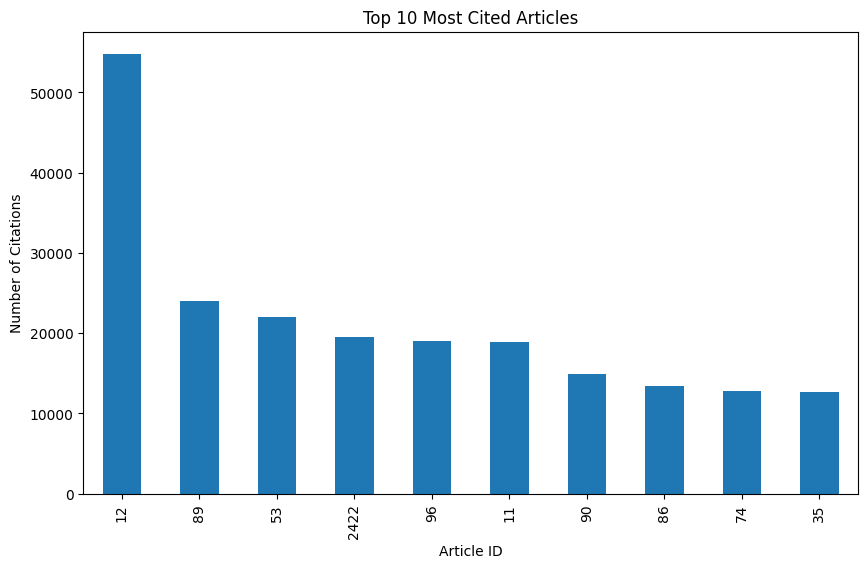

In [ ]:
# Top 10 most cited articles
most_cited_articles = df_article1.sort_values(by='cited_by', ascending=False).head(10)
print("\nTop 10 Most Cited Articles:")
print(most_cited_articles[['article_id', 'title', 'cited_by']])

# Plot most cited articles
plt.figure(figsize=(10, 6))
most_cited_articles.set_index('article_id')['cited_by'].plot(kind='bar')
plt.title('Top 10 Most Cited Articles')
plt.xlabel('Article ID')
plt.ylabel('Number of Citations')
plt.show()

*So, the most popular Article ID as seen from 'cited by' is the article with id 12 titled Deep Learning

<ipython-input-51-5581e18e0445>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_article1['authors'] = df_article1['authors'].str.split(', ')



Top 10 Most Prolific Authors:
authors
Manchester R.A.                                                                                                     6
Jr.                                                                                                                 4
Dawson W.J.                                                                                                         3
Gadd G.M.                                                                                                           3
Zhang Z.; Dong Y.; Li F.; Zhang Z.; Wang H.; Huang X.; Li H.; Liu B.; Wu X.; Wang H.; Diao X.; Zhang H.; Wang J.    2
Homola J.                                                                                                           2
Walsh G.                                                                                                            2
Khatkar B.S.; David Schofield J.                                                                                    2
Seddon K.R.      

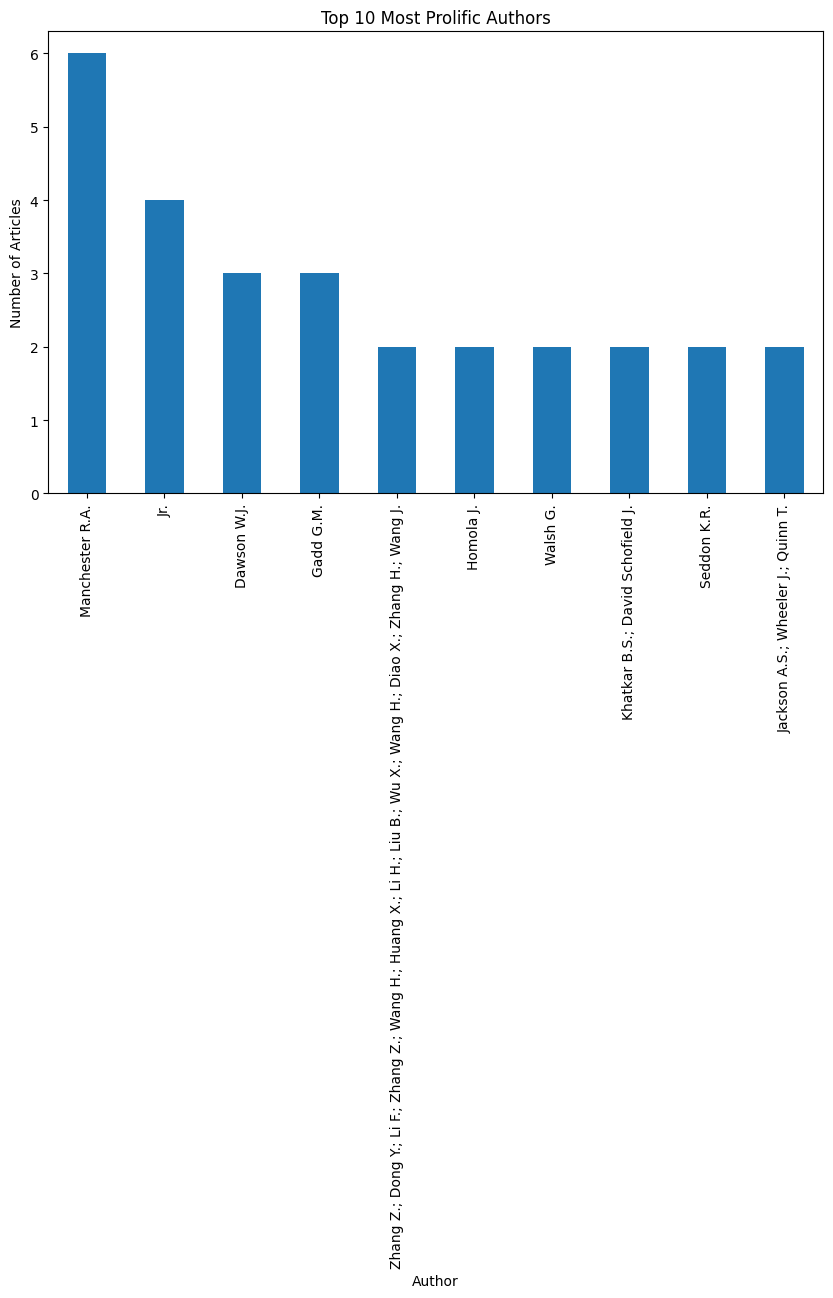

In [ ]:
#Most profilic authors based on the number of articles

# Split authors and explode the DataFrame
df_article1['authors'] = df_article1['authors'].str.split(', ')
exploded_authors = df_article1.explode('authors')

# Count articles per author
articles_per_author = exploded_authors['authors'].value_counts()
print("\nTop 10 Most Prolific Authors:")
print(articles_per_author.head(10))

# Plot most prolific authors
plt.figure(figsize=(10, 6))
articles_per_author.head(10).plot(kind='bar')
plt.title('Top 10 Most Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.show()

*So, the most profilic authors based on the number of articles is Manchester R.A with 6 articles*

<ipython-input-53-001c05dbe574>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_article1['index_keywords'] = df_article1['index_keywords'].str.split('; ')



Top 10 Most Common Index Keywords:
index_keywords
article                      634
priority journal             556
nonhuman                     425
human                        425
review                       415
Humans                       380
Environmental engineering    320
bioengineering               313
Biotechnology                291
physical chemistry           287
Name: count, dtype: int64


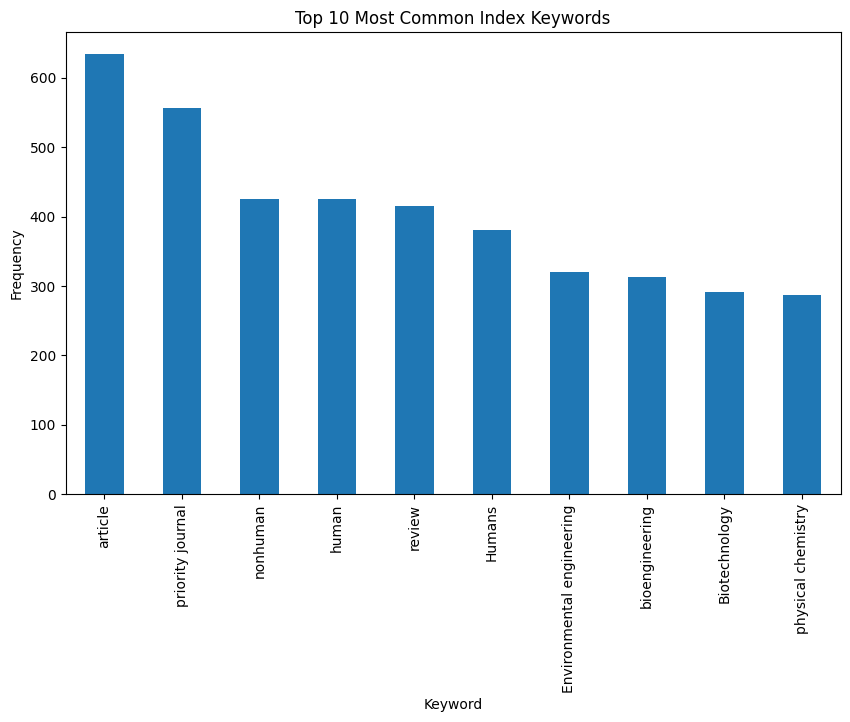

In [ ]:
#Most common index keywords

# Split keywords and explode the DataFrame
df_article1['index_keywords'] = df_article1['index_keywords'].str.split('; ')
exploded_keywords = df_article1.explode('index_keywords')

# Count occurrences of each keyword
keywords_count = exploded_keywords['index_keywords'].value_counts()
print("\nTop 10 Most Common Index Keywords:")
print(keywords_count.head(10))

# Plot most common keywords
plt.figure(figsize=(10, 6))
keywords_count.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Index Keywords')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

*So, The most common index keywords is Article*

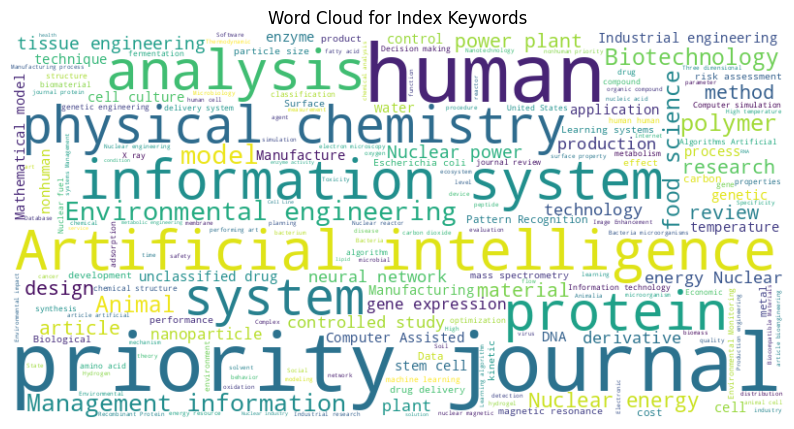

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for index keywords to know the most word that often
keyword_text = ' '.join(exploded_keywords['index_keywords'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Index Keywords')
plt.show()

*So, the most frequently occurring keywords in the dataset is human/priority journal*


Top 10 Authors by Total Citations:
authors
Lecun Y.; Bengio Y.; Hinton G.                                                                                                                                                                                                                54825
Chen T.; Guestrin C.                                                                                                                                                                                                                          24010
Ioffe S.; Szegedy C.                                                                                                                                                                                                                          22048
Weigend F.; Ahlrichs R.                                                                                                                                                                                                         

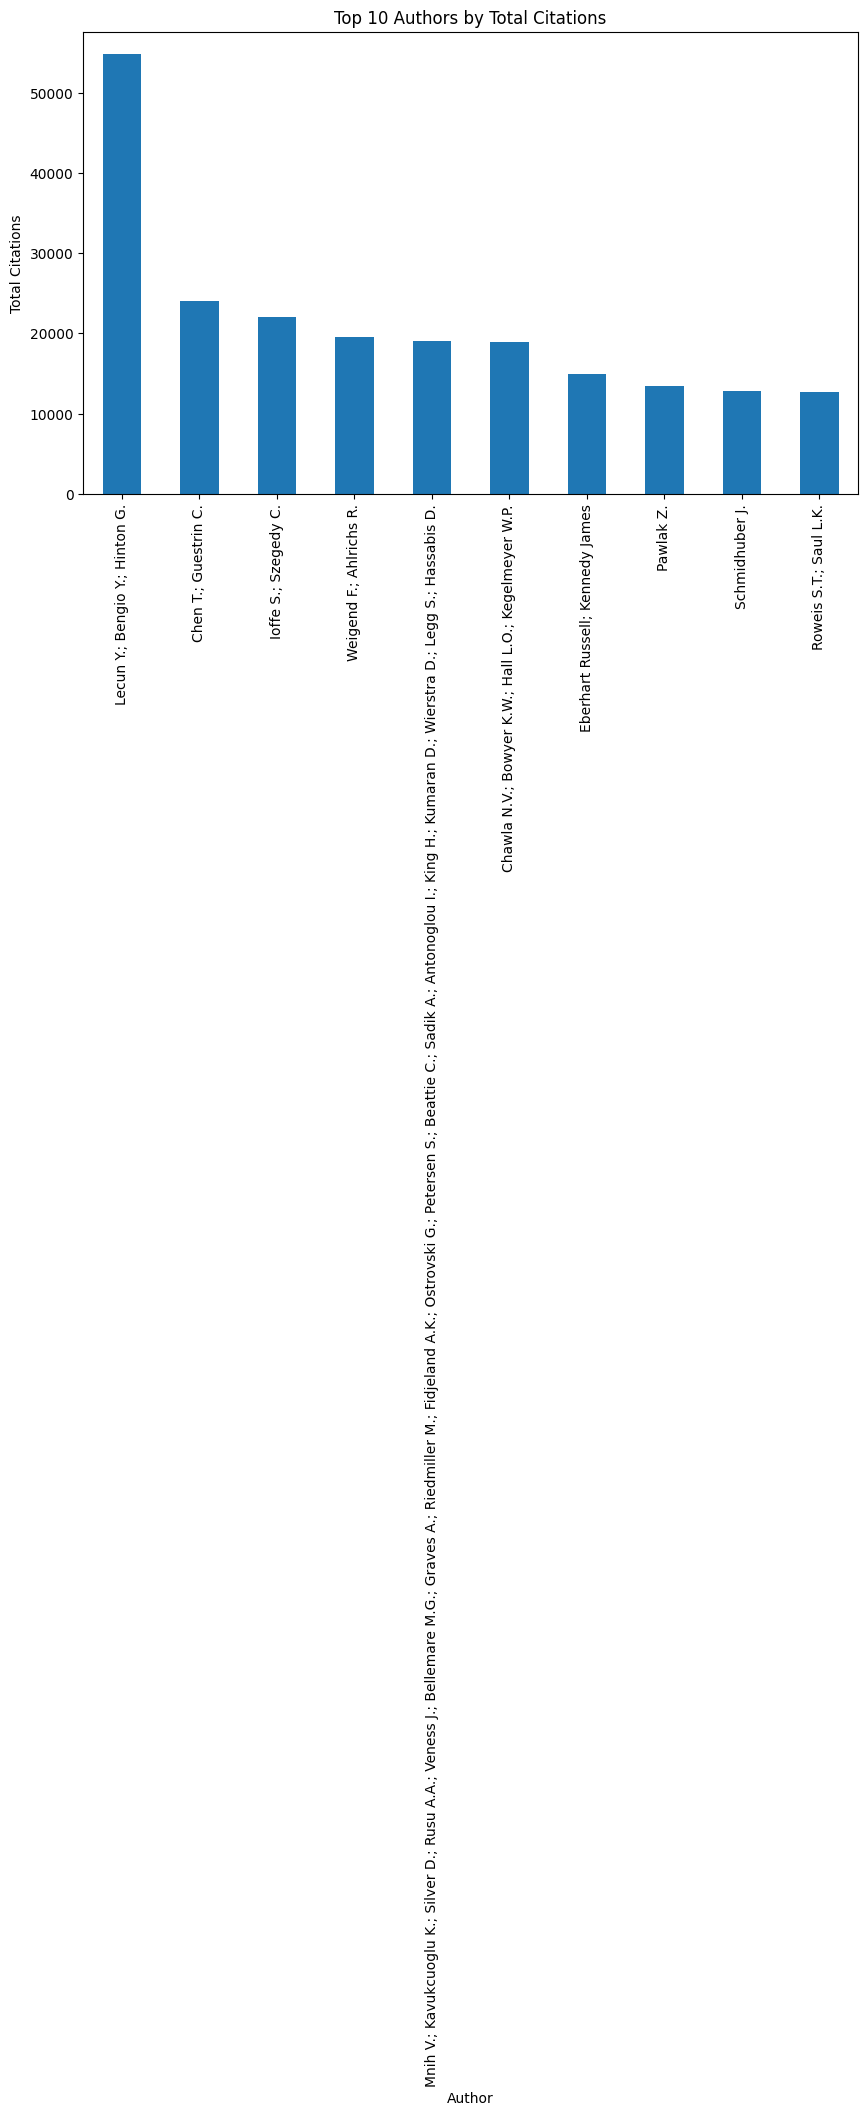

In [ ]:
#Top Authors by Citations

# Calculate total citations per author
citations_per_author = exploded_authors.groupby('authors')['cited_by'].sum()

# Top 10 authors by total citations
top_cited_authors = citations_per_author.sort_values(ascending=False).head(10)
print("\nTop 10 Authors by Total Citations:")
print(top_cited_authors)

# Plot top cited authors
plt.figure(figsize=(10, 6))
top_cited_authors.plot(kind='bar')
plt.title('Top 10 Authors by Total Citations')
plt.xlabel('Author')
plt.ylabel('Total Citations')
plt.show()


*So, the Top Author by citation is Lecun Y.; Bengio Y.; Hinton G.*

### *Rating and User*

In [ ]:
# Number of ratings per user
ratings_per_user = df_rating['user_id'].value_counts()
print("\nNumber of Ratings per User:")
print(ratings_per_user.describe())


Number of Ratings per User:
count    2968.000000
mean        3.369272
std         5.383922
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       151.000000
Name: count, dtype: float64



Top 10 Users who Rated the Most Articles:
user_id
2807    151
2476    146
1269    108
2169     61
826      58
871      43
1379     39
2464     38
435      36
959      36
Name: count, dtype: int64


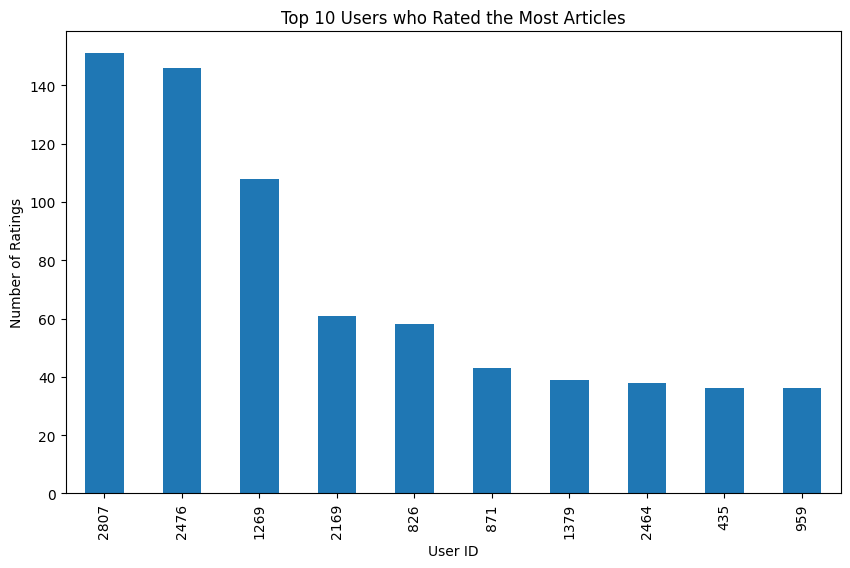

In [ ]:
# Top 10 users who rated the most articles
top_users = ratings_per_user.head(10)
print("\nTop 10 Users who Rated the Most Articles:")
print(top_users)

# Plot top users
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar')
plt.title('Top 10 Users who Rated the Most Articles')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

*So, The user who rated the most articles is user with ID 2807*

### *Rating and Article*

In [ ]:
# Number of ratings per article
ratings_per_article = df_rating['article_id'].value_counts()
print("\nNumber of Ratings per Article:")
print(ratings_per_article.describe())


Number of Ratings per Article:
count    2494.000000
mean        4.009623
std        36.943804
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1737.000000
Name: count, dtype: float64


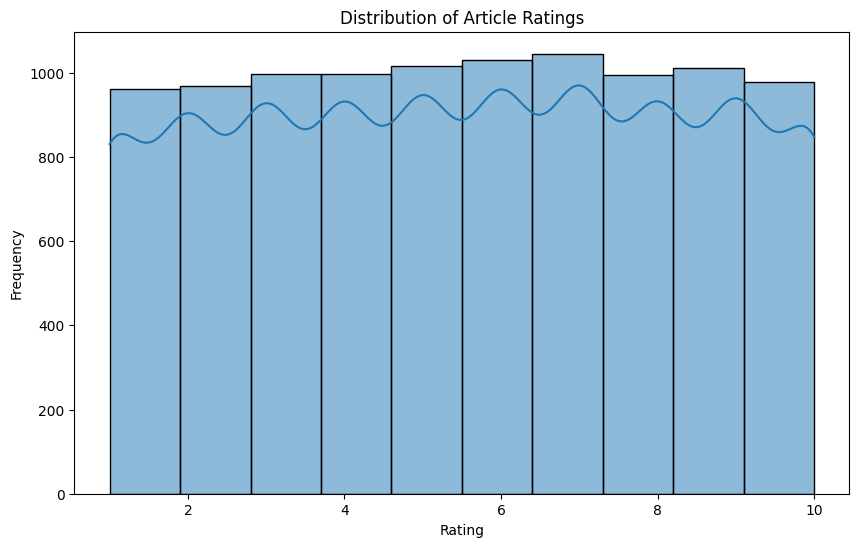

In [ ]:
# Distribution of article ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['article_rating'], bins=10, kde=True)
plt.title('Distribution of Article Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

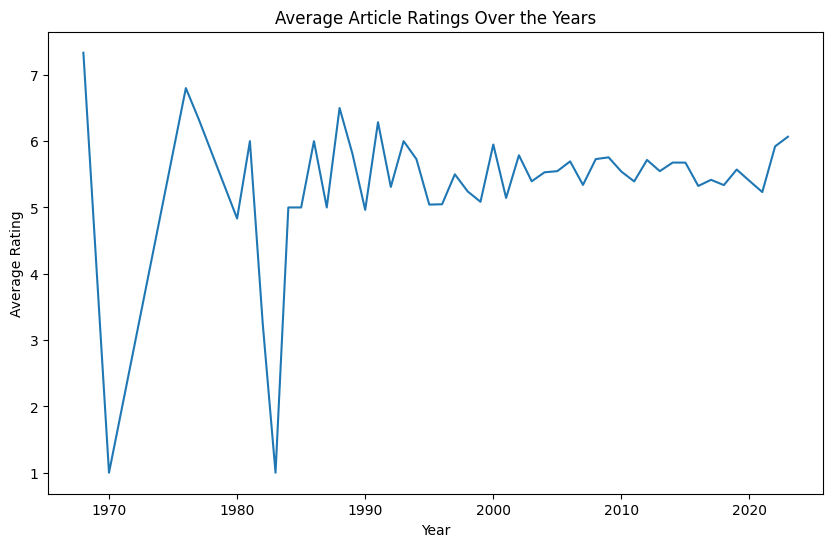

In [ ]:
# Ratings over the years
# Merge the DataFrames to analyze relationships
df_merged = df_rating.merge(df_article1, on='article_id').merge(df_user, on='user_id')

ratings_by_year = df_merged.groupby('year')['article_rating'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values)
plt.title('Average Article Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


Top 10 Highest Rated Articles:
article_id
1306    10.0
2379    10.0
261     10.0
475     10.0
103     10.0
102     10.0
1801    10.0
1774    10.0
2448    10.0
1133    10.0
Name: article_rating, dtype: float64


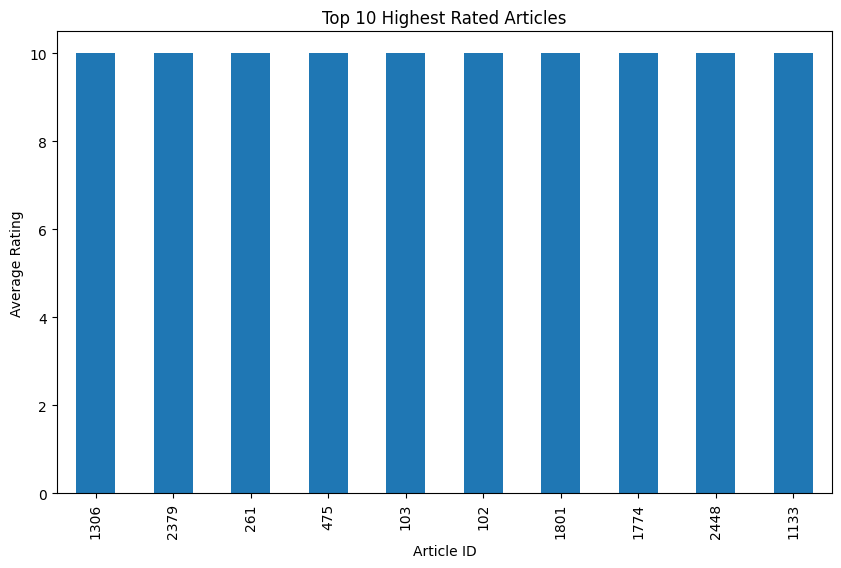

In [ ]:
# Calculate average rating per article
average_rating_per_article = df_rating.groupby('article_id')['article_rating'].mean()

# Top 10 highest rated articles
top_rated_articles = average_rating_per_article.sort_values(ascending=False).head(10)
print("\nTop 10 Highest Rated Articles:")
print(top_rated_articles)

# Plot top-rated articles
plt.figure(figsize=(10, 6))
top_rated_articles.plot(kind='bar')
plt.title('Top 10 Highest Rated Articles')
plt.xlabel('Article ID')
plt.ylabel('Average Rating')
plt.show()



Top 10 Authors with Highest Average Article Ratings:
authors
Gutowski T.; Murphy C.; Allen D.; Bauer D.; Bras B.; Piwonka T.; Sheng P.; Sutherland J.; Thurston D.; Wolff E.    10.0
Fakhrazari A.; Boroushaki M.                                                                                       10.0
Bankar S.B.; Bule M.V.; Singhal R.S.; Ananthanarayan L.                                                            10.0
Ardura A.; Pola I.G.; Ginuino I.; Gomes V.; Garcia-Vazquez E.                                                      10.0
Zeng H.; Cai W.; Liu P.; Xu X.; Zhou H.; Klingshirn C.; Kalt H.                                                    10.0
Zheng B.; Zhou Y.; Smugeresky J.E.; Schoenung J.M.; Lavernia E.J.                                                  10.0
Thybo A.K.; Mlgaard J.P.; Kidmose U.                                                                               10.0
Hale R.C.; Alaee M.; Manchester-Neesvig J.B.; Stapleton H.M.; Ikonomou M.G.                       

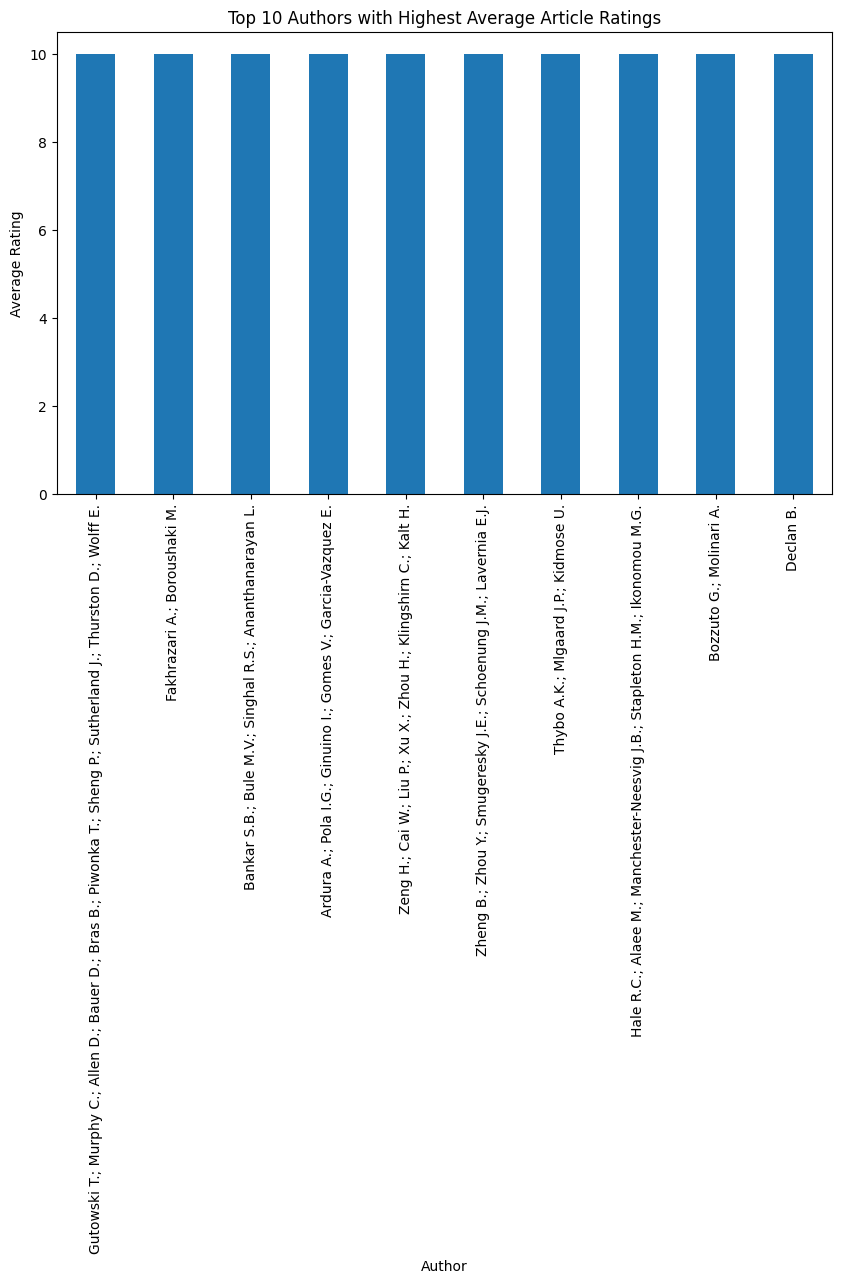

In [ ]:
#Authors with the highest average article ratings
# Merge rating data with exploded authors DataFrame
merged_author_ratings = df_rating.merge(exploded_authors, on='article_id')

# Calculate average rating per author
average_rating_per_author = merged_author_ratings.groupby('authors')['article_rating'].mean()

# Top 10 authors with highest average rating
top_rated_authors = average_rating_per_author.sort_values(ascending=False).head(10)
print("\nTop 10 Authors with Highest Average Article Ratings:")
print(top_rated_authors)

# Plot top-rated authors
plt.figure(figsize=(10, 6))
top_rated_authors.plot(kind='bar')
plt.title('Top 10 Authors with Highest Average Article Ratings')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.show()